In [9]:
import numpy as np
import pandas as pd
from util import BackTest
from agent import ContinuousAgent
from util.config import Config

In [4]:
conf = Config(path='config/continuous_05-L.yaml')
ca =  ContinuousAgent(config=conf)
ca.load_weights('weights/05L_actor.h5f', 'weights/05L_critic.h5f')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Colocations handled automatically by placer.


/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Environment '<class 'gym.envs.custom.env.TradingEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
df = pd.read_csv('data/fitx.txt')

In [9]:
df = df.iloc[0:1050]
df.index = range(df.shape[0])

In [14]:
df.columns = ['Date', 'Time', 'O', 'H', 'L', 'C', 'V']

In [15]:
df.to_csv('data/y3.csv', index=False)

In [16]:
ca.backtest('data/y3.csv', 1000)


_______________________________________________________________________________________________________


Accuracy:	62.86% 
Total:		35
Avg Win:	0.01%	Max Win:	0.03%
Avg Loss:	0.0%	Max Loss:	0.02%
Max Drawdown: 0.0002
Sharpe: 6.1859
Sortino: 16.9825


In [19]:
ca.bt_df['market_price']= (ca.bt_df['H']+ca.bt_df['L'])/2

In [27]:
ca.bt_df['val'] = ca.bt_df['market_price'].diff().shift(-1).fillna(0)*ca.bt_df.Position

In [38]:
np.equal(ca.bt_df['val'], ca.bt_df['PnL']).all()

True

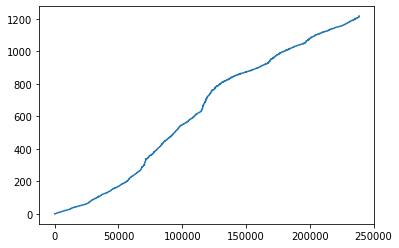

In [5]:
import matplotlib.pyplot as plt
plt.plot(ca.bt_df['Cum_PnL'])
ca.bt_df.to_csv('journal/3yjournal.csv', index=False)

In [2]:
test_array = np.random.normal(size=(500, 11))

In [3]:
test_df = pd.DataFrame(test_array, columns=['Date', 'O', 'H', 'L', 'C', 'V', 'tmp1', 'tmp2', 'tmp3', 'tmp4', 'tmp5'])

In [4]:
test_df

,Date,O,H,L,C,V,tmp1,tmp2,tmp3,tmp4,tmp5
0,-2.119996,-0.148606,0.404186,-1.932309,-0.710589,-0.612165,0.537166,0.026400,0.124352,-0.675335,-0.511085
1,2.312370,1.097624,-1.423205,-1.187301,-1.375313,1.155634,-0.882581,-0.889762,-0.810577,-0.287981,-0.156857
2,1.253181,1.215135,-0.811875,0.837997,-1.210634,-1.142888,-1.271919,-0.236858,-0.121055,0.735924,0.567095
3,0.742833,2.603069,0.322282,-0.907447,-0.015944,-0.069927,0.810374,-0.546966,-1.074881,0.178128,-1.723779
4,1.345496,-0.529079,-0.057967,-0.162377,-0.651793,1.457617,0.993575,1.035479,-0.709764,1.416717,0.007903
...,...,...,...,...,...,...,...,...,...,...,...
495,0.589512,-0.503442,-1.002886,0.125854,-0.169910,-1.353263,-1.146620,-2.415714,1.789003,0.505440,-0.900746
496,1.736591,-0.819557,-0.719989,-0.549807,0.815675,-0.002629,-0.711055,-1.267661,0.238688,-0.247946,-0.396368
497,1.021051,0.448625,-0.286205,0.283199,-0.496471,1.244284,-2.393713,0.955347,0.347843,0.216209,1.391438
498,0.685555,0.389727,-1.539637,0.990122,0.955539,0.904098,-0.299633,0.563228,0.296376,-0.459912,-0.427967


In [5]:
class tempModel:
    def __init__(self):
        pass
    def predict(self, data):
        return np.random.choice([1,-1,0])

In [6]:
model = tempModel()
bt = BackTest(test_df, model)

In [7]:
res = bt.out()

In [8]:
res

,O,H,L,C,V,Pos,PnL,Cum_PnL,Return
0,-0.148606,0.404186,-1.932309,-0.710589,-0.612165,1,-0.541191,-0.541191,0.708308
1,1.097624,-1.423205,-1.187301,-1.375313,1.155634,0,0.000000,-0.541191,-0.000000
2,1.215135,-0.811875,0.837997,-1.210634,-1.142888,-1,0.305644,-0.235547,23.401148
3,2.603069,0.322282,-0.907447,-0.015944,-0.069927,0,0.000000,-0.235547,-0.000000
4,-0.529079,-0.057967,-0.162377,-0.651793,1.457617,-1,0.961325,0.725777,-8.725649
...,...,...,...,...,...,...,...,...,...
495,-0.503442,-1.002886,0.125854,-0.169910,-1.353263,-1,0.196382,-20.255838,-0.447834
496,-0.819557,-0.719989,-0.549807,0.815675,-0.002629,0,0.000000,-20.255838,-0.000000
497,0.448625,-0.286205,0.283199,-0.496471,1.244284,1,-0.273254,-20.529092,181.758286
498,0.389727,-1.539637,0.990122,0.955539,0.904098,0,0.000000,-20.529092,-0.000000
